In [27]:
# Učitavanje potrebnih biblioteka i omogućavanje prikaza slike

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [28]:
# Učitavanje YOLOv3 modela

net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

In [45]:
# Učitavanje COCO datoteke i slike

with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
img = cv2.imread('cat.png')

In [46]:
# Stvaranje blob-a i postavljanje ulaza za mrežu na stvoreni blob

blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [47]:
# Dohvaćanje naziva izlaznih slojeva i prolazak kroz mrežu

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

In [48]:
# Crtanje okvira oko prepoznatih objekata

confidences = []
class_ids = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            width = int(detection[2] * img.shape[1])
            height = int(detection[3] * img.shape[0])
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            confidences.append(float(confidence))
            class_ids.append(class_id)
            boxes.append([left, top, width, height])

In [49]:
# Primjenjivanje postupka nepreklapanja kako bi se uklonili preklapajući okviri

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [50]:
# Provjera koliko je objekata YOLOv3 prepoznao

print(len(indices))

1


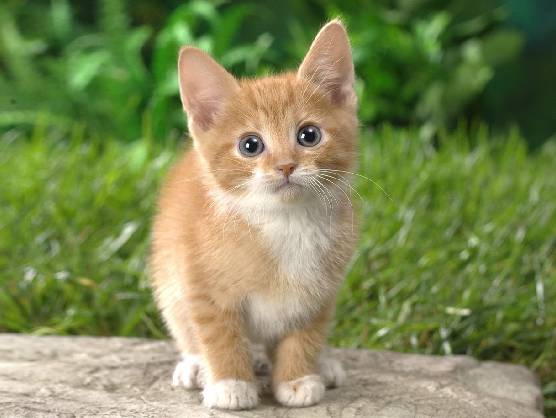

In [51]:
# Prikaz originalne slike

cv2_imshow(img)

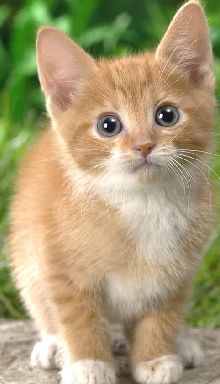

In [52]:
# Izrezivanje i ispisivanje detektiranih objekata

if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        crop_img = img[y:y+h, x:x+w]
        print()
        cv2_imshow(crop_img)
else:
    print("Na slici nije prepoznat ni jedan objekt.")